# Task 1 -- Square Root of 2

I used the Digit-by-digit calculation in order to help calculate the square root of two accuratly to 100 decimal places.
This algorithm can be found here https://en.wikipedia.org/wiki/Methods_of_computing_square_roots#Digit-by-digit_calculation


My code works by using a for loop with a while loop inside. 
The for loop will run 101 times due to the decimal point counting as a character.

We start by setting the maxConstraint equal to 9 as the values can only be elements of natural numbers from values of 0 to 9.
The while loop calculates the nearest possible number to the value of c.
For example at the beginning C is equal to 2. 
The algorithm "maxConstraint * (20*root + maxConstraint) > c"  runs , taking -1 off maxConstraint everytime until it is equal to 1 in this case.
This is because " 1((20)(0) + 1) > c" is true and is the closest possible number to c.
This then adds the max constraint to the digits list.

I then set y equal to "maxConstraint * (20*root + maxConstraint)" as it returns the largest number that can be created that is less than c. We will later use y to calculate the remainder.

On line 24 , root is set to the value of "(10*root) + maxConstraint". Here we are ensuring that the number we are dealing with is always an integer, such to avoid python's float precision limitations.

I then set c equal to "100*(c-y)" as it gives us back the new remainder which will be fed back through the while loop.
Due to the square root of 2 being irrational there will be infinite remainders.

The code will continue this cycle until the for loop breaks at 100 decimal places.
I then insert the decimal place in the 1st position of the list 'digits' and convert digits to a string to be joined together.




In [8]:
def sqrt(val, decimals):

    root = 0 # value of the root we have
    c = val # Cannot be less than C
    
    digits = [] #Digits List
    
    for _ in range(decimals):
        maxConstraint = 9
        while maxConstraint * (20*root + maxConstraint) > c:  
        #This works by getting the nearest possible
        #square root that goes into our 'remainder' c.
      
            maxConstraint -= 1
        
        #Add x to the List
        digits.append(maxConstraint)        
        
        #Get the largest possible number 
        #that is less than the root
        y = maxConstraint * (20*root + maxConstraint)             
       
        # creating a new starting point
        # for the algorithm
        # ignoring decimals     
        root = (10 * root) + maxConstraint 
        
        # new 'remainder' to work with
        # this is slightly different to the
        # algorithm found
        # we multiply by 100 here due to us looking
        # further down the decimal numbers in the list
        c = 100*(c - y)
    
    digits_text = digits[:1] + ["."] + digits[1:]
    #Add a decimal point in position 1 of the digits array
    digits_text = list(map(str, digits_text))
    digits_text = "".join(digits_text)
    
    return(digits_text)

In [9]:
sqrt(2, 101) # The decimal value is at 101 as the '.' counts as a character

'1.4142135623730950488016887242096980785696718753769480731766797379907324784621070388503875343276415727'

<hr>

# Task 2 -- Chi² testing



### Initial Test
In the initial test we see that the p-value is 0.0004. From this we can reject the null hypothesis and accept that at least one of our samples is not independent due to the p-value being less than 0.05.

### A & B
When having just A & B together we receieve a p-value of 0.002. This means that the null hypothesis is  rejected and A & B are not independent of eachother.

### A & C and B & C
When having just A & C together we receieve a p-value of 0.307. This means that the null hypothesis is not  rejected and A & B are independent of eachother.

This is the same when using B & C. The p-value is 0.0792 meaning the null hypothesis is not  rejected and B & C are independent of eachother.

### C & D
When having just C & D together we receieve a p-value of 0.0164. This means that the null hypothesis is  rejected and C & D are not independent of eachother.

### (A+B) & (C+D)
For my final test I added A + B and C + D. My p-value was 0.118  meaning the null hypothesis is not rejected and that A & B are not independent of each other ,similarly for C & D.

The new sample of (A+B) is independent of our other new sample (C+D) which confirmed the hypothesis above that A and B are of the same population but different to C and D. And vice versa

### Conculsion
From the above we can reasonably conclude that A & B are sampled from the same population, similarly for C & D.


In [10]:
#Initial Test

from scipy.stats import chi2_contingency
import numpy as np

obs = np.array([[90,60,104,95],
                [30,50,51,20 ],
                [30,40,45,35 ]])

g, p, degreeOfFreedom, expected  = chi2_contingency(obs)

# The null hypothesis is that all of the events are independent.
# Thus the alternate hypothesis is that at least 1 is not independent.

# We recieve a p-value of less than 0.05.
# Thus we can conclude that there is enough evidence to reject the null hypothesis 
# and assume that at least 1 of the events is not independent from the others.

print("{:.1f}".format(g)) 
print(p) 
#lower the p , the higher the confidence

24.6
0.0004098425861096696


In [11]:
# A & B

from scipy.stats import chi2_contingency
import numpy as np

obs = np.array([[90,60],
                [30,50],
                [30,40]])

g, p, degreeOfFreedom, expected  = chi2_contingency(obs)

#NOT INDEPENDENT - rejects a&b

print("{:.1f}".format(g))
print(p) 

12.4
0.002000644872215657


In [12]:
# A & C

from scipy.stats import chi2_contingency
import numpy as np

obs = np.array([[90,104],
                [30,51 ],
                [30,45 ]])

g, p, degreeOfFreedom, expected  = chi2_contingency(obs)

# No evidence to reject null hypo , so we must accept 
#A & C are independent of eachother.

print("{:.1f}".format(g))
print(p)

2.4
0.3072693526050842


In [13]:
# B & C

from scipy.stats import chi2_contingency
import numpy as np

obs = np.array([[60,104],
                [50,51 ],
                [40,45]])

#Although a small p value as it is not less than 0.05 
#We still dont have enough evidence to reject

#No evidence to reject null hypothesis , so we must accept. 
#B & C are independent of eachother.

g, p, degreeOfFreedom, expected  = chi2_contingency(obs)


print("{:.1f}".format(g))
print(p)

5.1
0.0792815886956327


In [14]:
# C & D

from scipy.stats import chi2_contingency
import numpy as np

obs = np.array([[104,95],
                [51 ,20],
                [45 ,35]])

g, p, degreeOfFreedom, expected  = chi2_contingency(obs)

#C & D - p value less that 0.05 , enough evidence to reject null hypothesis.
#We can assume C & D are not independent.

print("{:.1f}".format(g))
print(p)

8.2
0.016431707024441123


In [15]:
# (A & B),(C & D)

from scipy.stats import chi2_contingency
import numpy as np

obs = np.array([[90 + 60,104+95],
                [30 + 50,51+20 ],
                [30 + 40,45+35 ]])

g, p, degreeOfFreedom, expected  = chi2_contingency(obs)

#From our experimentation we have justification via p-values to conclude that a & b
#were sampled from the same population and that c & d were sampled from the sample population. 
#However the populations that a&b and c & d were pulled from are independednt of eachother,
#hence once we combine a & b and combine c & d we now have 2 independent samples
#as is proven by the chi2 test ran on the 2 samples

print("{:.1f}".format(g)) 
print(p) 

4.3
0.11872975696950533


<hr>

# Task 3 -- Standard Deviation
STDEV. S assumes that its arguments are a sample of the population. 
If your data represents the entire population, then you would compute the standard deviation using STDEV. P.

The calculation for the standard deviation of the population is 
**np.sqrt(np.sum((x - np.mean(x))**2)/len(x)) .

The calculation for the standard deviation of a sample is 
**np.sqrt(np.sum((x - np.mean(x))**2)/(len(x)-1)) .

They are simlar but the sample removes -1 from the length of x.

This is as it is using Bessels Correction which uses n-1 instead of n.
This method corrects the bias in the estimation of the population variance and partially corrects the bias in the estimation of the populations standard deviation.
However, the correction often increases the mean squared error in these estimations.

Using n-1 also allows for a larger standard deviation which accounts for not analysing the entire population.

It accounts for fact that we dont know the populations true standard deviation.
Therefore dividing by the total number of samples would give us the standard deviation of the sample.

However, we have no way of knowing if this standard deviation is the standard deviation of the population therefore dividing by n-1 allows for a larger estimate of the population which lets us correct the bias of the original calculation.

### References 

Bessel's correction
https://en.wikipedia.org/wiki/Bessel%27s_correction





In [16]:
import numpy as np

#STDDEV.P


x = [1,2,3,4,5,6,7,8,9,10]

print(np.sqrt(np.sum((x - np.mean(x))**2)/len(x)))

x = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]

np.sqrt(np.sum((x - np.mean(x))**2)/len(x))

2.8722813232690143


8.65544144839919

In [17]:
import numpy as np

#STDDEV.S

x = [1,2,3,4,5,6,7,8,9,10]

print(np.sqrt(np.sum((x - np.mean(x))**2)/(len(x)-1)))

x = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]

np.sqrt(np.sum((x - np.mean(x))**2)/len(x)-1)

3.0276503540974917


8.597480251019288

# Task 4 -- Fisher’s Iris data set

Text(0, 0.5, 'Petal Width')

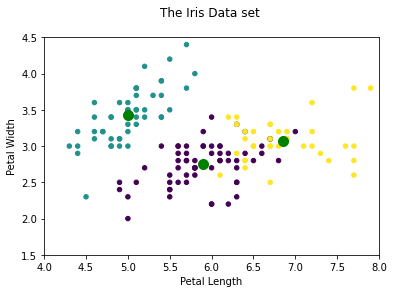

In [10]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plthttp://localhost:8888/notebooks/Emerging%20Technology%20-%20Tasks.ipynb#Task-4----Fisher%E2%80%99s-Iris-data-set
import matplotlib.patches as mpatches
import numpy as np

#Load in the Iris data set
iris = load_iris()

#Specify the number of clusters to 3
# as there are 3 flower categories
kmeans = KMeans(n_clusters=3)

#This trains our machine learning with the data
KMmodel = kmeans.fit(iris.data)

#This predicteds the category of our data  
categories = KMmodel.labels_  

#Get the average of each cluster
KMmodel.cluster_centers_

#Set X equal to the array of data
X = np.array(iris.data)

# Plot the data set.
plt.scatter(X[:, 0], X[:, 1], s=20, c=categories)
#Plot the center point of all the different clusters.
plt.scatter(KMmodel.cluster_centers_[:, 0], KMmodel.cluster_centers_[:, 1], s=100, color = 'g')

# Set reasonable limits.
plt.xlim(4,8)
plt.ylim(1.5,4.5)

#Add Titles & Labels
plt.title('The Iris Data set \n')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

#plt.legend()